# Data Loading and Libraries

In [1]:
# Importing necessary library
import pandas as pd

# Load dataset
file_path = r'C:\Users\balaj\Documents\DataProjects\fraudtest.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Dataset Dimensions
We check how many rows and columns are present in the fraud detection dataset.


In [2]:
# Checking the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 555719 rows and 23 columns.


### Dataset Overview
We use `df.info()` to understand the structure of the dataset — column names, data types, and missing values. This helps in planning preprocessing steps like type conversion or handling null values.


In [3]:
# Getting an overview of the dataset: column types, non-null counts, memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Statistical Summary
Using `df.describe()` to understand the distribution of numerical columns. This helps in identifying data skewness, outliers, and feature scaling issues.


In [4]:
df.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,15-12-2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,23-03-1977,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


## 🔍 Class Distribution of Fraudulent vs. Non-Fraudulent Transactions
We check the proportion of fraud (`1`) vs. non-fraud (`0`) to understand class imbalance.


In [7]:
df['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

In [6]:
fraud_counts = df['is_fraud'].value_counts()
fraud_percentages = df['is_fraud'].value_counts(normalize=True)

# Combine into a DataFrame for cleaner output
pd.DataFrame({
    'Count': fraud_counts,
    'Percentage': (fraud_percentages * 100).round(2)
})

,Count,Percentage
is_fraud,,
0,553574,99.61
1,2145,0.39


## 🧹 Missing Value Analysis
We check for missing/null values in each column to decide if imputation or removal is necessary.

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0               0
zip                      0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
state                    0
trans_date_trans_time    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
cc_num                   0
is_fraud                 0
dtype: int64

## 🧽 Handling Missing Values
We remove rows with missing values to ensure clean input for analysis and modeling.

In [12]:
df = df.dropna()
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## 🔧 Imputing Missing Values
- Filled missing values in `amt` with median.
- Filled missing values in `merchant` with mode (most frequent value).

In [14]:
df['amt'] = df['amt'].fillna(df['amt'].median())
df['merchant'] = df['merchant'].fillna(df['merchant'].mode()[0])

# 👥 Fraud Distribution by Gender
- Counted total fraud cases per gender.
- This gives insight into whether fraud is more prevalent in a specific gender group.

In [16]:
df.groupby('gender')['is_fraud'].sum()


gender
F    1164
M     981
Name: is_fraud, dtype: int64

In [18]:
df['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

# 📊 Fraud Rate by Gender (%)
- Calculated the percentage of transactions marked as fraud within each gender group.
- This gives normalized insight into whether one gender is disproportionately targeted or involved in fraud.

In [20]:
fraud_rate = df.groupby('gender')['is_fraud'].mean().sort_values(ascending=False) * 100

In [21]:
print(fraud_rate.round(2))

gender
M    0.39
F    0.38
Name: is_fraud, dtype: float64


## EXPLORATORY DATA VISUALIZATION(EDA)

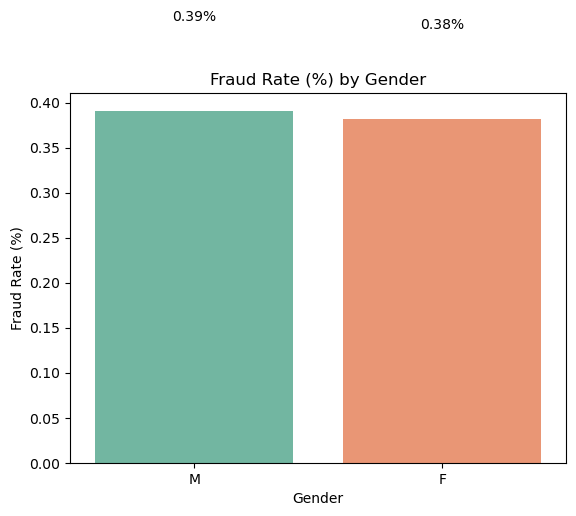

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Bar plot for fraud rate by gender
sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='Set2')
plt.title('Fraud Rate (%) by Gender')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Gender')

# Add value labels on bars
for i, value in enumerate(fraud_rate.values):
    plt.text(i, value + 0.1, f"{value:.2f}%", ha='center')

plt.show()



# Crosstab: Proportion of Fraudulent Transactions by Gender
This table shows the percentage distribution of fraudulent and non-fraudulent transactions by gender.

In [29]:
pd.crosstab(df['gender'], df['is_fraud'], margins=True, normalize='index').round(5)


is_fraud,0,1
gender,,
F,0.99618,0.00382
M,0.99609,0.00391
All,0.99614,0.00386


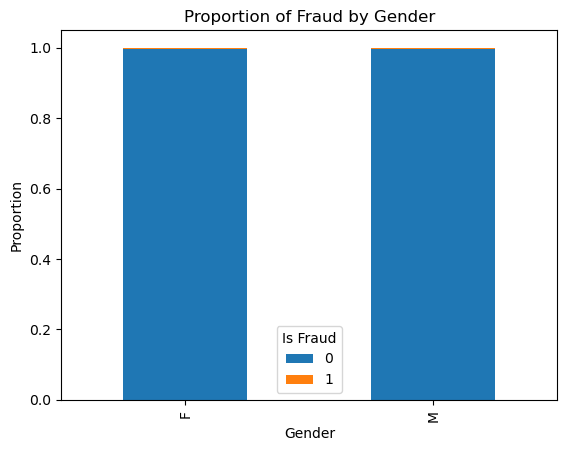

In [30]:
fraud_ct = pd.crosstab(df['gender'], df['is_fraud'], normalize='index')
fraud_ct.plot(kind='bar', stacked=True)
plt.title("Proportion of Fraud by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.legend(title='Is Fraud')
plt.show()


# Pivot Table: Fraud Summary by Gender
This table shows the total fraud cases, fraud rate, and number of transactions for each gender group.

In [31]:
pivot_df = df.pivot_table(values='is_fraud', index='gender', aggfunc=['sum', 'mean', 'count'])
pivot_df.columns = ['Total Frauds', 'Fraud Rate', 'Total Transactions']
pivot_df.round(4)

,Total Frauds,Fraud Rate,Total Transactions
gender,,,
F,1164,0.0038,304886
M,981,0.0039,250833


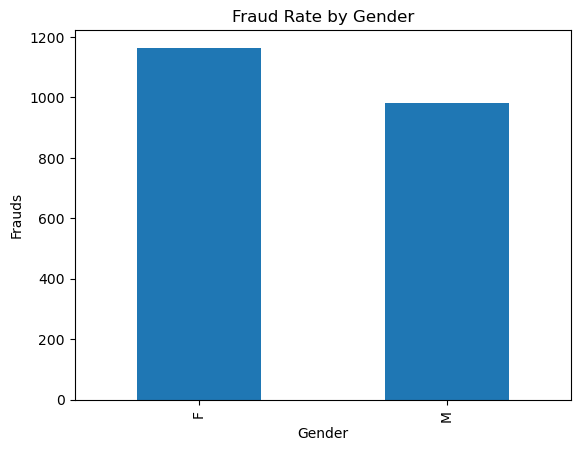

In [34]:
pivot_df['Total Frauds'].plot(kind='bar')
plt.title('Fraud Rate by Gender')
plt.ylabel('Frauds')
plt.xlabel('Gender')
plt.show()

In [35]:
male_df = df.query("gender == 'M'")
female_df = df.query("gender == 'F'")

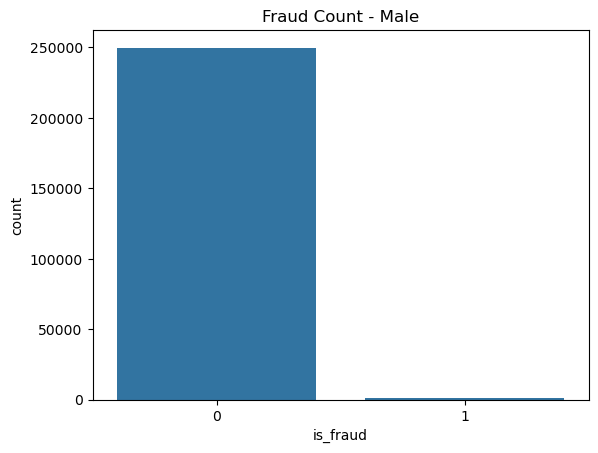

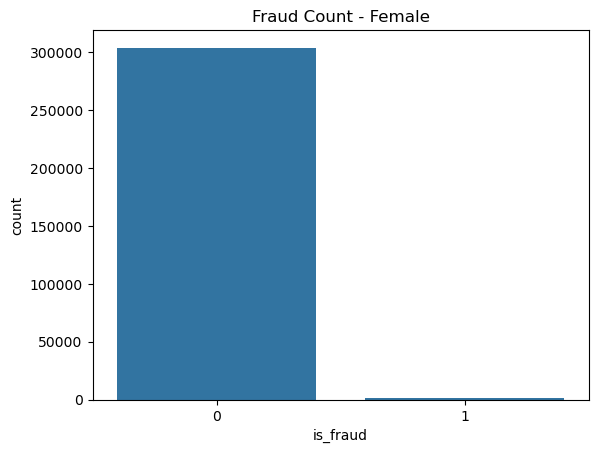

In [36]:
sns.countplot(data=male_df, x='is_fraud')
plt.title('Fraud Count - Male')
plt.show()

sns.countplot(data=female_df, x='is_fraud')
plt.title('Fraud Count - Female')
plt.show()

In [37]:
print("Avg Fraud Amount (Male):", male_df[male_df['is_fraud'] == 1]['amt'].mean())
print("Avg Fraud Amount (Female):", female_df[female_df['is_fraud'] == 1]['amt'].mean())

print("Max Fraud Amount (Male):", male_df[male_df['is_fraud'] == 1]['amt'].max())
print("Max Fraud Amount (Female):", female_df[female_df['is_fraud'] == 1]['amt'].max())


Avg Fraud Amount (Male): 587.0187971457696
Avg Fraud Amount (Female): 478.91687285223367
Max Fraud Amount (Male): 1320.92
Max Fraud Amount (Female): 1319.97


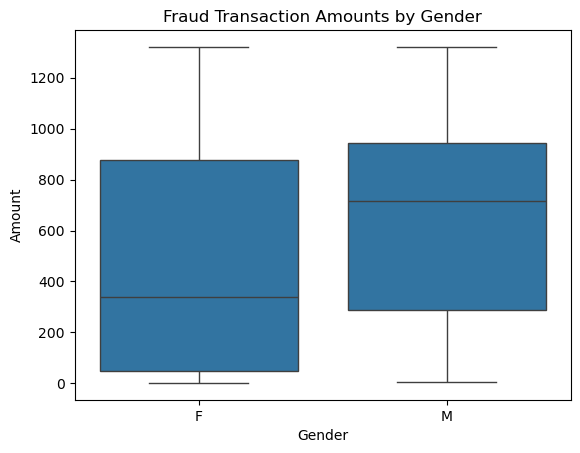

In [38]:
fraud_df = df[df['is_fraud'] == 1]

sns.boxplot(x='gender', y='amt', data=fraud_df)
plt.title('Fraud Transaction Amounts by Gender')
plt.ylabel('Amount')
plt.xlabel('Gender')
plt.show()

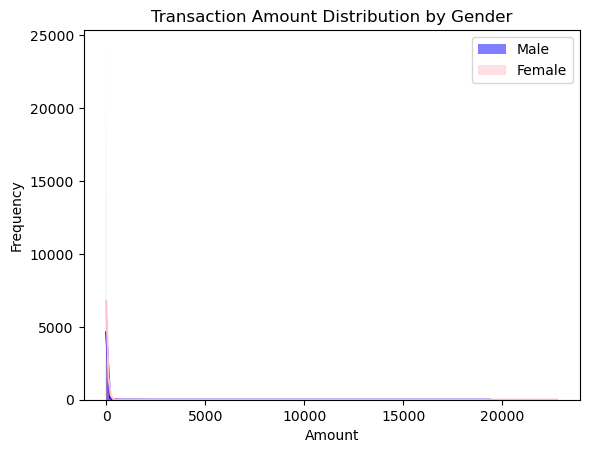

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(male_df['amt'], label='Male', color='blue', kde=True)
sns.histplot(female_df['amt'], label='Female', color='pink', kde=True)
plt.legend(loc='upper right')
plt.title('Transaction Amount Distribution by Gender')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


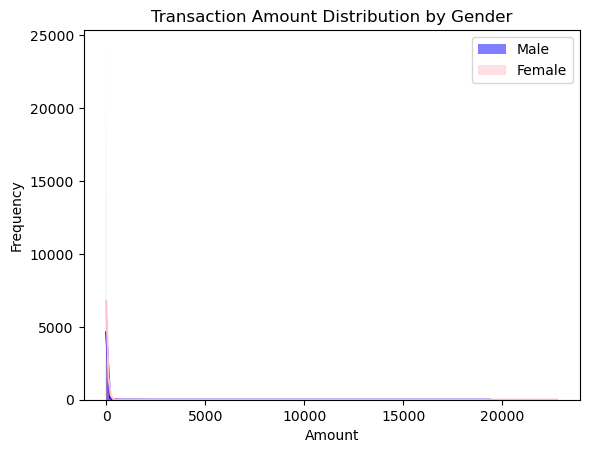

In [13]:
sns.histplot(male_df['amt'], label='Male', color='blue', kde=True)
sns.histplot(female_df['amt'], label='Female', color='pink', kde=True)
plt.legend(loc='upper right')  # instead of 'best'
plt.title('Transaction Amount Distribution by Gender')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

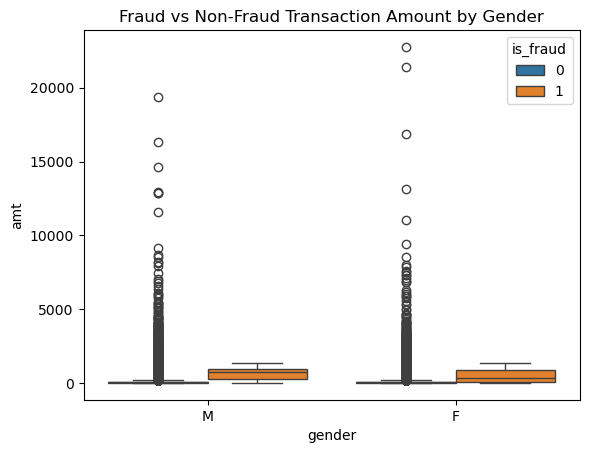

In [14]:
sns.boxplot(x='gender', y='amt', hue='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Amount by Gender')
plt.show()

In [15]:
pd.crosstab(male_df['category'], male_df['is_fraud'], normalize='index') * 100
pd.crosstab(female_df['category'], female_df['is_fraud'], normalize='index') * 100

is_fraud,0,1
category,,
entertainment,99.805514,0.194486
food_dining,99.779334,0.220666
gas_transport,99.792286,0.207714
grocery_net,99.826198,0.173802
grocery_pos,99.133935,0.866065
health_fitness,99.768376,0.231624
home,99.786201,0.213799
kids_pets,99.796921,0.203079
misc_net,99.254844,0.745156


In [16]:
fraud_by_gender = df.groupby('gender')['is_fraud'].mean()
print(fraud_by_gender)

gender
F    0.003818
M    0.003911
Name: is_fraud, dtype: float64


In [17]:
fraud_by_city = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False).head(10)
fraud_by_state = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False).head(10)

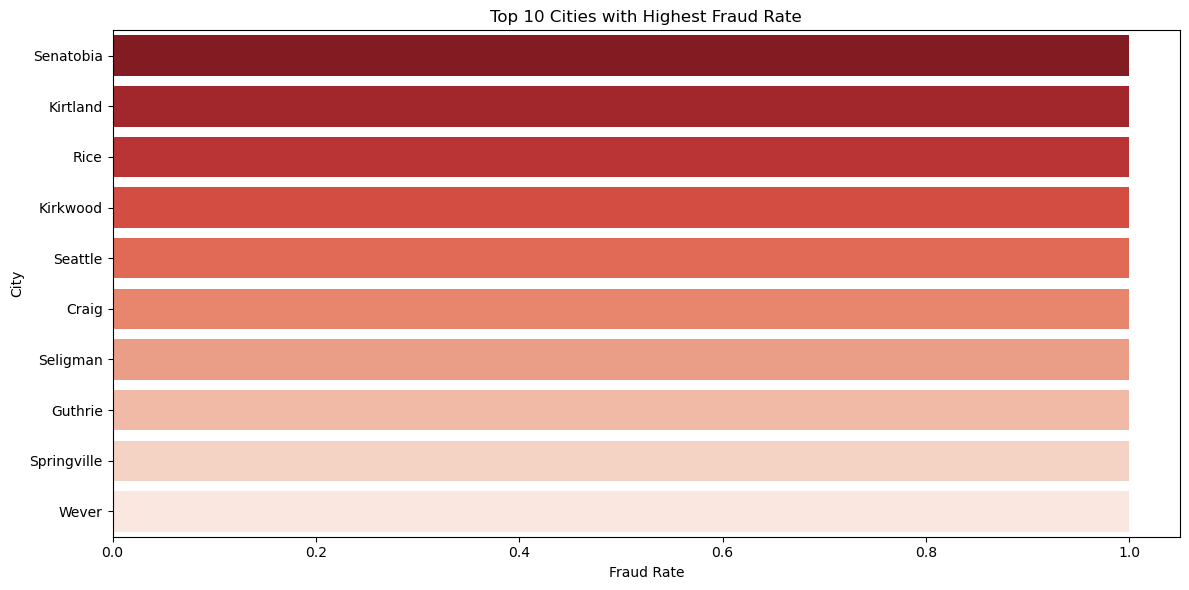

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fraud_by_city = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False).head(10)
fraud_by_city_df = fraud_by_city.reset_index()
fraud_by_city_df.columns = ['city', 'fraud_rate']

plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_by_city_df, x='fraud_rate', y='city', hue='city', palette='Reds_r', legend=False)
plt.xlabel('Fraud Rate')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Fraud Rate')
plt.tight_layout()
plt.show()


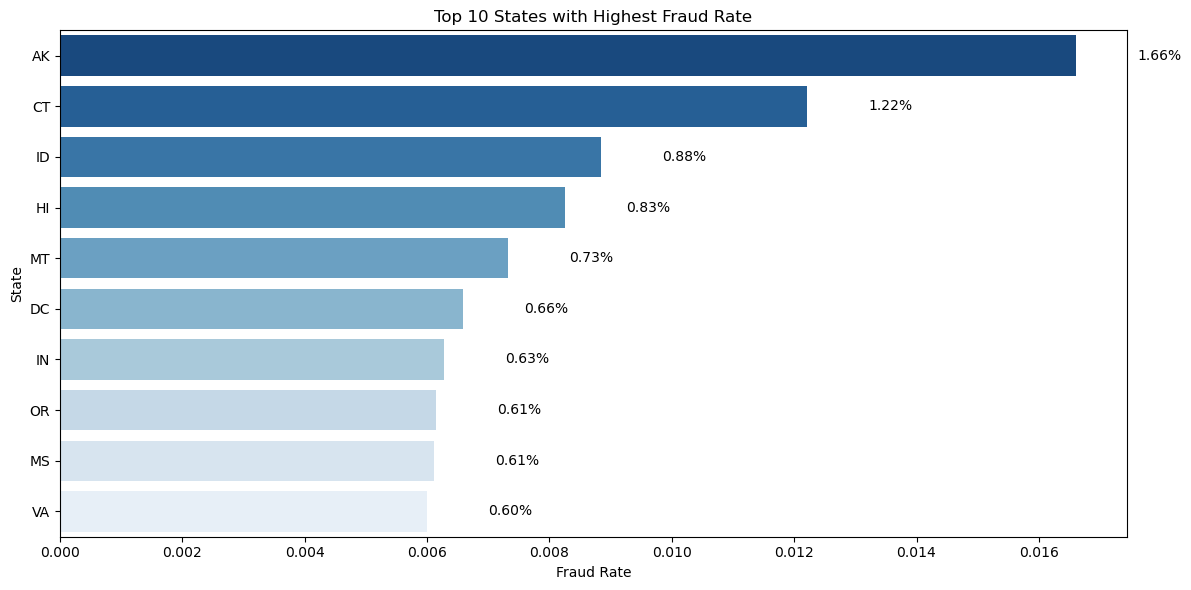

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fraud_by_state = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False).head(10)
state_names = fraud_by_state.index
fraud_rates = fraud_by_state.values

plt.figure(figsize=(12,6))
sns.barplot(x=fraud_rates, y=state_names, hue=state_names, palette='Blues_r', legend=False)

# Annotate values
for i, value in enumerate(fraud_rates):
    plt.text(value + 0.001, i, f'{value:.2%}', va='center')

plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.title('Top 10 States with Highest Fraud Rate')
plt.tight_layout()
plt.show()


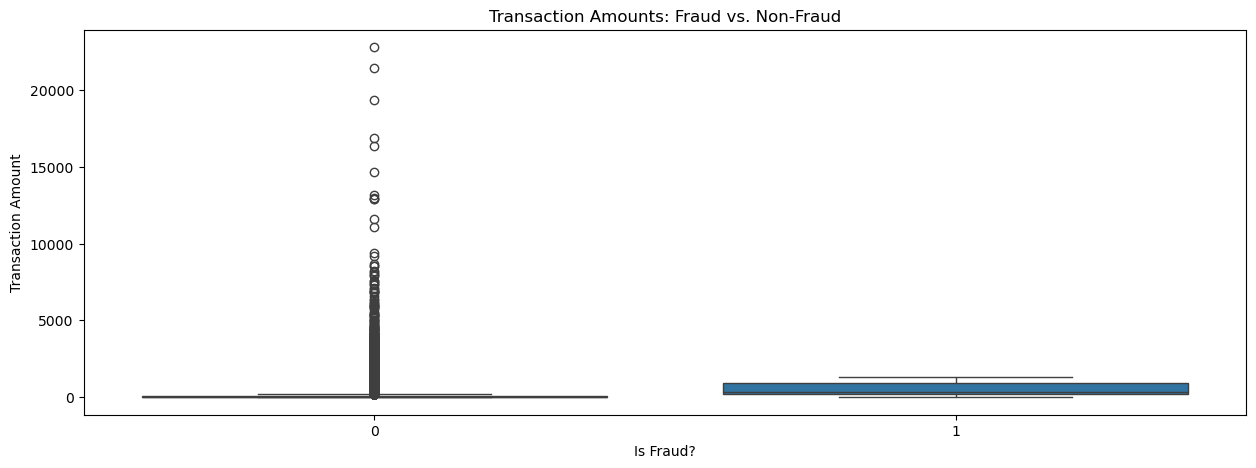

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title("Transaction Amounts: Fraud vs. Non-Fraud")
plt.xlabel("Is Fraud?")
plt.ylabel("Transaction Amount")
plt.show()
b

In [27]:
from sklearn.metrics import classification_report

# Actual and predicted values
y_true = [1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0]

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8

